# Problem Statement

Aim of this exercise is to get initial insights of the dataset and develop a predictor model using logistic regression algorithm.

### Methodology

Logistic regresion model development is divided into multiple stpes as mentioned below,
1. Data exploring and understanding: This step involves preliminary level data understanding and exploring.

2. Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

3. Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.

4. Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type. 

5. Train-test split: This step involves spliting the dataset into train and test parts.

6. Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
    - Model development using all the feature columns.
    - RFE to reduce number of features.
    - Manually reducing the features using p value and VIF for each feature.
    - Confusion Matrix
    - Sensitivity Vs Specificity and Precision Vs Recall trade-offs
    - ROC curve
    - Evaluation on test dataset
    - Feature importance

7. Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing Dependancies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, log_loss, plot_roc_curve
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading Dataset

In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


It can be observed that dataset is having 14 columns, which includes 1 target column.

1. age
2. sex: 1=male, 0=female
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = Not available ,1 = fixed defect; 2 = normal; 3 = reversable defect
14. target: 1=yes, 0=no

In [3]:
# Data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It can be observed that,
- data is having no null values.  
- all the columns are of int64 type except one which is float64. However, we may need to change some of these columns to categorical.

## 1. Data Exploring and understanding

<AxesSubplot:xlabel='age', ylabel='Density'>

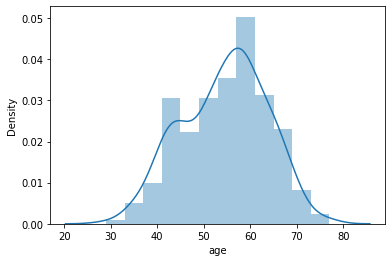

In [4]:
# age: Checking the distribution of age


sns.distplot(data.age)

The age is verying from 20s to 70s. Most of the people belong the the bracket of 40 to 65.

In [5]:
# Gender

data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Data is having 2:1 share of male to female.

In [6]:
# cp: Chest pain

data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

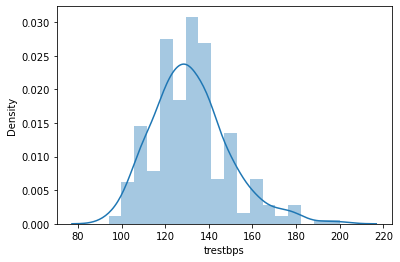

In [7]:
# trestbps: resting blood pressure: Checking the distribution

sns.distplot(data.trestbps)

The resting blood pressure for most of the people is in the range of 100 to 150

<AxesSubplot:xlabel='chol', ylabel='Density'>

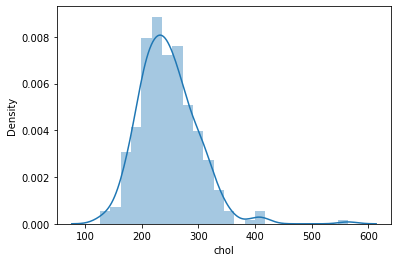

In [8]:
# chol: cholestrol: Checking the distribution

sns.distplot(data.chol)

Cholestrol level is mainly ranging from 200 to 300.

In [9]:
# fbs: fasting blood sugar (1 if fasting blood sugar > 120 mg/dl or 0)

data.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [10]:
# restecg: resting electrocardiographic results (values 0,1,2)

data.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

It can be observed that frequency for category 2 is vary less. However we are not going to drop as there can be some usefull information present in those data entries.

<AxesSubplot:xlabel='thalach', ylabel='Density'>

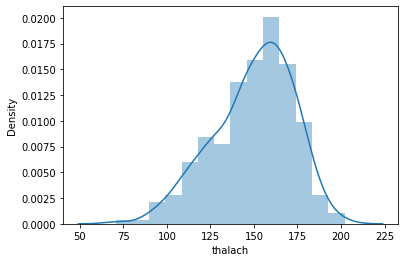

In [11]:
# thatach: maximum heart rate achieved
# Checking the distribution

sns.distplot(data.thalach)

Max achieved heart rate is from 75 to 200. A significant numbers have the heart rate around 160.

In [12]:
# exang: exercise induced angina (1 = yes; 0 = no)

data.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

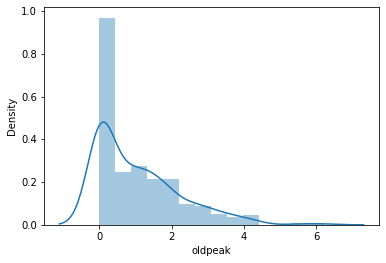

In [13]:
# oldpeak: oldpeak = ST depression induced by exercise relative to rest
# Checking the distribution


sns.distplot(data.oldpeak)

oldpeak value is near null for most of the dataset.

In [14]:
# slope: the slope of the peak exercise ST segment

data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [15]:
# ca: number of major vessels (0-3) colored by flourosopy

data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [16]:
# thal: 0 = Not available ,1 = fixed defect; 2 = normal; 3 = reversable defect

data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Two entries have 0 thal value that means data is unavailable. There rows can be dropped while making model.

In [17]:
# target: 1=yes, 0=no

data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

There target (dependent) variable is having quite uniform distribution. It helps both in EDA as well as model building.

## 2. Data Cleaning

In [18]:
# Dropping entires with 0 value for 'thal'

data = data.drop(data[data.thal==0].index)

In [19]:
# Mapping categorical columns to appropriate object values

data.sex = data.sex.map({0:'female', 1:'male'})
data.cp = data.cp.map({0:'cat_0', 1:'cat_1', 2:'cat_2', 3:'cat_3'})
data.fbs = data.fbs.map({0:'no', 1:'yes'})
data.restecg = data.restecg.map({0:'val_0', 1:'val_1', 2:'val_2'})
data.exang = data.exang.map({0:'no', 1:'yes'})
data.slope = data.slope.map({0:'up', 1:'flat', 2:'down'})
data.thal = data.thal.map({1:'fixed_defect', 2:'normal', 3:'rev_defect'})
data.ca = data.ca.map({0:'0_ves', 1:'1_ves', 2:'2_ves', 3:'3_ves', 4:'4_ves'})
data.target = data.target.astype('object')

## 3. Data Visualization

<AxesSubplot:>

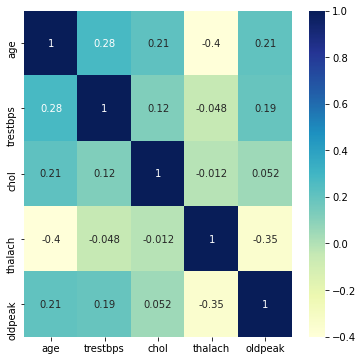

In [20]:
# Pearson's correlation

# numeric columns
num_cols = data.select_dtypes(include=('int64', 'float64')).columns


# heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='YlGnBu')

Observation,
- There isn't any strong observable relationship between numeric columns as per heatmap.

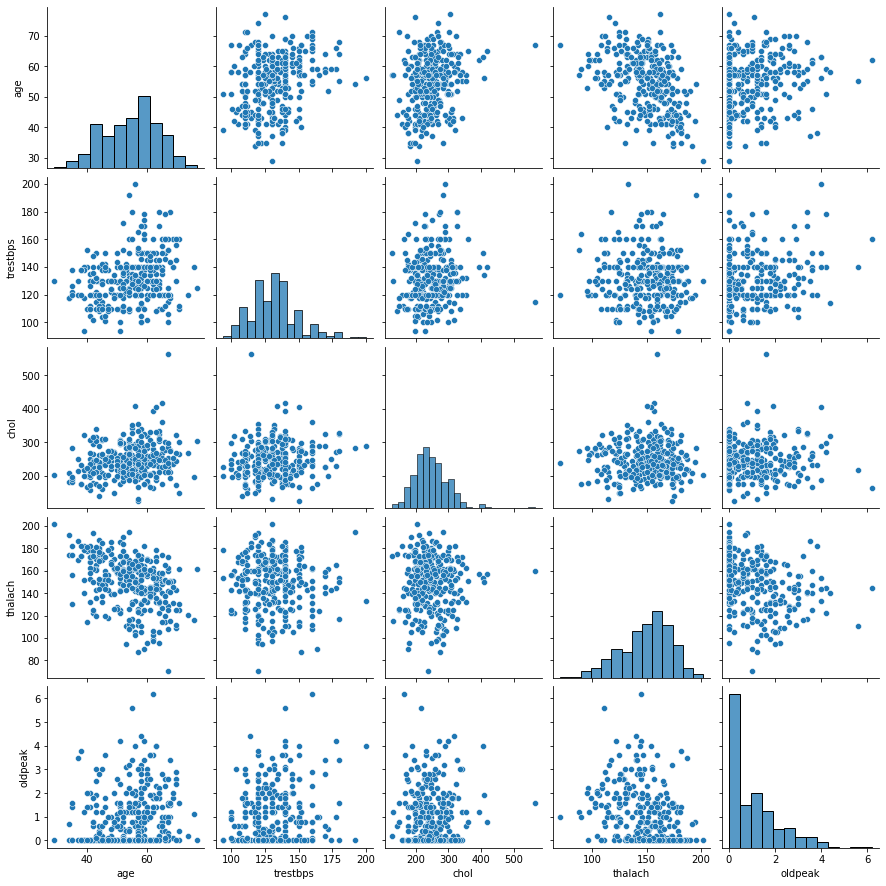

In [21]:
# pairplot: Visualizing scatter plot between numeric columns

sns.pairplot(data[num_cols])

Observations,
- slight negative correlation can be observed between 'age' and 'thalach'.
- 'age' is having slight positive relation with 'chol'.

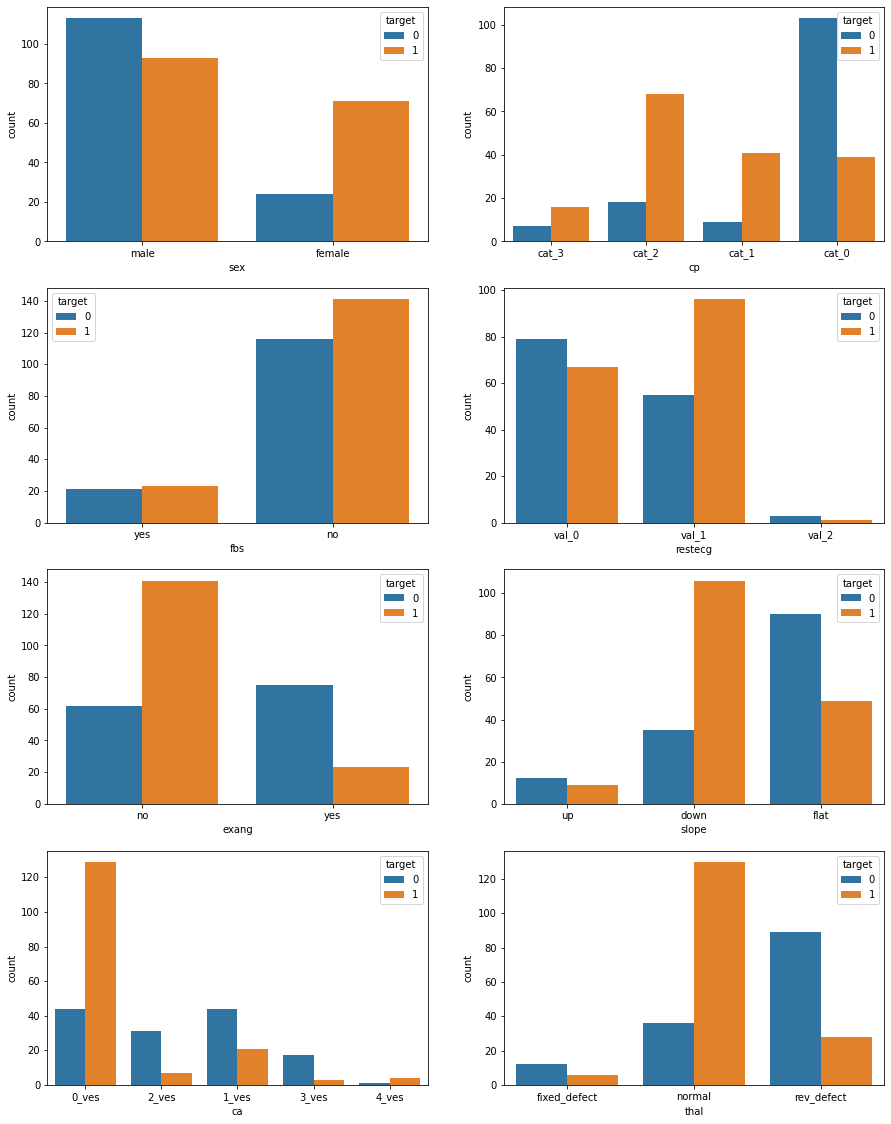

In [22]:
# countplot: categorical columns Vs dependent variable (price)

cat_cols = data.select_dtypes(include = 'object').columns
cat_cols = cat_cols.drop('target')  #dropping target column

plt.subplots(figsize=(15,25))
i = 1

for col in cat_cols:
    plt.subplot(int(len(cat_cols)/2)+1, 2 , i)
    sns.countplot(x=col, hue='target', data=data)
    i = i + 1

Observations,
- Higher fraction of heart patients amongst female.
- Cat_0 chest pain is safer as compared to other categories.
- restecg with categories 0 and 1 are more frequent.
- absence of exang tend to increase the chances of having heart problem.
- slop with category down have increased chances of having heart disease.
- normal thal tends to results into heart problem as compared to other categories of thal.

## 4. Data Preparation

In [23]:
# data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    object 
 2   cp        301 non-null    object 
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    object 
 6   restecg   301 non-null    object 
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    object 
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    object 
 11  ca        301 non-null    object 
 12  thal      301 non-null    object 
 13  target    301 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 43.4+ KB


In [24]:
# Creating dummy variables for categorical datatype

dummies = pd.get_dummies(data[cat_cols], drop_first=True)

In [25]:
# combinng dummies with numeric columns and target 

data1 = pd.concat([data[num_cols], dummies, data['target']], axis=1)
data1.head()

,age,trestbps,chol,thalach,oldpeak,sex_male,cp_cat_1,cp_cat_2,cp_cat_3,fbs_yes,...,exang_yes,slope_flat,slope_up,ca_1_ves,ca_2_ves,ca_3_ves,ca_4_ves,thal_normal,thal_rev_defect,target
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [26]:
# splitting into X and y

X = data1.drop('target', axis=1)
y = data1['target'].astype('int64')

## 5. Train-Test split

In [27]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100,
                                     stratify=y)

#### Rescaling the dataset

In [28]:
# Minmax scaling

# instantiating the scalers
scaler_X = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), index=X_test.index, columns=X_test.columns)


## 6. Model Development - Validation and Evaluation

#### Model development using all the features

In [29]:
# Logistic regression model using statsmodels Generalized linear model

lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      188
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.260
Date:                Sat, 06 Feb 2021   Deviance:                       130.52
Time:                        14:32:23   Pearson chi2:                     387.
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9945      1.877      1.595      0.111      -0.685       6.674
age                 1.4955      1.433      1.044      0.296      -1.312       4.303
trestbps           -2.8007      1.203     -2.327      0.020      -5.159      -0.442
chol               -2.4016      2.127     -1.129      0.259      -6.570       1.766
thalach             2.6887      1.862      1.444      0.149      -0.960       6.338
oldpeak            -0.6428      1.804     -0.356      0.722      -4.178       2.893
sex_male           -1.7795      0.704     -2.529      0.011      -3.159      -0.400
cp_cat_1            1.0564      0.815      1.295      0.195      -0.542       2.655
cp_cat_2            1.5092      0.579      2.607      0.009       0.375       2.644
cp_cat_3            1.6847      0.923      1.826      0.068      -0.124       3.493
fbs_yes             1.1533      0.725      1.591      0.112      -0.268       2.574
restecg_val_1       0.3735      0.492      0.759      0.448      -0.592       1.338
restecg_val_2      -0.6908      2.645     -0.261      0.794      -5.875       4.493
exang_yes          -0.9836      0.553     -1.779      0.075      -2.067       0.100
slope_flat         -1.3901      0.608     -2.286      0.022      -2.582      -0.198
slope_up           -1.3716      1.198     -1.145      0.252      -3.719       0.976
ca_1_ves           -2.6038      0.610     -4.271      0.000      -3.799      -1.409
ca_2_ves           -3.5919      1.042     -3.448      0.001      -5.634      -1.550
ca_3_ves           -3.1378      1.179     -2.661      0.008      -5.449      -0.826
ca_4_ves           17.9918   1.69e+04      0.001      0.999    -3.3e+04    3.31e+04
thal_normal        -0.1340      0.973     -0.138      0.890      -2.041       1.773
thal_rev_defect    -1.5293      0.905     -1.690      0.091      -3.302       0.244
===================================================================================
"""

Observation,
- Many features with p values above 0.05. This indicates they aren't significant in this model.
- Next we would use RFE to eliminate features aggressively.

#### RFE to reduce number of features

In [30]:
# RFE

lm2 = LogisticRegression()
rfe = RFE(lm2, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [31]:
# Feature importance understanding

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 7),
 ('trestbps', True, 1),
 ('chol', False, 4),
 ('thalach', True, 1),
 ('oldpeak', True, 1),
 ('sex_male', True, 1),
 ('cp_cat_1', True, 1),
 ('cp_cat_2', True, 1),
 ('cp_cat_3', True, 1),
 ('fbs_yes', False, 2),
 ('restecg_val_1', True, 1),
 ('restecg_val_2', False, 5),
 ('exang_yes', True, 1),
 ('slope_flat', True, 1),
 ('slope_up', False, 3),
 ('ca_1_ves', True, 1),
 ('ca_2_ves', True, 1),
 ('ca_3_ves', True, 1),
 ('ca_4_ves', False, 6),
 ('thal_normal', True, 1),
 ('thal_rev_defect', True, 1)]

In [32]:
# Dropping unimportant features

X_train = X_train[X_train.columns[rfe.support_]]
X_test = X_test[X_test.columns[rfe.support_]]

We would be using combination of p values, VIFs and accuracy (since the model is having uniform target values distribution) to manually drop the features and check its performance.

#### Manually reducing the number of features using p value and VIF

In [33]:
# model iteration 2

X_train_sm = sm.add_constant(X_train)
lm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = lm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      194
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.093
Date:                Sat, 06 Feb 2021   Deviance:                       136.19
Time:                        14:32:23   Pearson chi2:                     321.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6252      1.575      1.667      0.095      -0.461       5.711
trestbps           -2.0285      1.078     -1.881      0.060      -4.142       0.085
thalach             2.0477      1.696      1.208      0.227      -1.275       5.371
oldpeak            -2.0039      1.560     -1.285      0.199      -5.061       1.054
sex_male           -1.3210      0.632     -2.089      0.037      -2.561      -0.081
cp_cat_1            0.8908      0.775      1.149      0.251      -0.629       2.411
cp_cat_2            1.7533      0.565      3.101      0.002       0.645       2.861
cp_cat_3            1.5951      0.869      1.836      0.066      -0.107       3.298
restecg_val_1       0.4916      0.470      1.046      0.295      -0.429       1.412
exang_yes          -1.0086      0.536     -1.883      0.060      -2.059       0.041
slope_flat         -0.9724      0.527     -1.845      0.065      -2.005       0.061
ca_1_ves           -2.2590      0.565     -4.002      0.000      -3.365      -1.153
ca_2_ves           -2.8958      0.956     -3.030      0.002      -4.769      -1.023
ca_3_ves           -2.6036      1.067     -2.440      0.015      -4.695      -0.512
thal_normal        -0.0943      0.928     -0.102      0.919      -1.914       1.725
thal_rev_defect    -1.6112      0.867     -1.859      0.063      -3.310       0.087
===================================================================================
"""

Observations,
- Stil many features with p score above 0.05, which makes them insignificant.

In [34]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res2.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.862


In [35]:
# creating vif function

def get_VIF_table(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
get_VIF_table(X_train)

,Features,VIF
1,thalach,10.11
13,thal_normal,6.61
0,trestbps,5.37
14,thal_rev_defect,5.30
3,sex_male,3.82
2,oldpeak,2.30
5,cp_cat_2,2.20
7,restecg_val_1,2.17
9,slope_flat,2.16
8,exang_yes,2.07


In [37]:
# Dropping 'thalach': higher p value and VIF

X_train = X_train.drop('thalach', axis=1)
X_test = X_test.drop('thalach', axis=1)

In [38]:
# model iteration 3

X_train_sm = sm.add_constant(X_train)
lm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = lm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      195
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.858
Date:                Sat, 06 Feb 2021   Deviance:                       137.72
Time:                        14:32:23   Pearson chi2:                     309.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6009      1.375      2.618      0.009       0.905       6.297
trestbps           -1.8796      1.063     -1.768      0.077      -3.963       0.204
oldpeak            -2.5207      1.494     -1.687      0.092      -5.448       0.407
sex_male           -1.1300      0.602     -1.877      0.060      -2.310       0.050
cp_cat_1            0.9738      0.760      1.280      0.200      -0.517       2.464
cp_cat_2            1.8048      0.563      3.207      0.001       0.702       2.908
cp_cat_3            1.5640      0.863      1.812      0.070      -0.127       3.255
restecg_val_1       0.4436      0.465      0.955      0.340      -0.467       1.354
exang_yes          -1.1155      0.525     -2.124      0.034      -2.145      -0.086
slope_flat         -1.1408      0.508     -2.248      0.025      -2.136      -0.146
ca_1_ves           -2.3311      0.556     -4.192      0.000      -3.421      -1.241
ca_2_ves           -2.8418      0.955     -2.974      0.003      -4.714      -0.969
ca_3_ves           -2.8408      1.075     -2.643      0.008      -4.947      -0.734
thal_normal         0.1313      0.888      0.148      0.883      -1.610       1.873
thal_rev_defect    -1.4868      0.844     -1.761      0.078      -3.142       0.168
===================================================================================
"""

In [39]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res3.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.862


We do not see any improvement in model accuracy, but there is improvements in p values.

In [40]:
get_VIF_table(X_train)

,Features,VIF
0,trestbps,4.97
12,thal_normal,4.12
13,thal_rev_defect,4.09
2,sex_male,3.56
1,oldpeak,2.27
6,restecg_val_1,2.14
8,slope_flat,2.14
4,cp_cat_2,2.13
7,exang_yes,2.04
3,cp_cat_1,1.64


In [41]:
# Dropping 'thal_normal': higher p value

X_train = X_train.drop('thal_normal', axis=1)
X_test = X_test.drop('thal_normal', axis=1)

In [42]:
# model iteration 4

X_train_sm = sm.add_constant(X_train)
lm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = lm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.869
Date:                Sat, 06 Feb 2021   Deviance:                       137.74
Time:                        14:32:23   Pearson chi2:                     309.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7563      0.891      4.214      0.000       2.009       5.503
trestbps           -1.8942      1.059     -1.789      0.074      -3.969       0.181
oldpeak            -2.5700      1.458     -1.762      0.078      -5.428       0.288
sex_male           -1.1607      0.565     -2.053      0.040      -2.269      -0.053
cp_cat_1            0.9816      0.758      1.295      0.195      -0.504       2.467
cp_cat_2            1.8180      0.555      3.273      0.001       0.729       2.907
cp_cat_3            1.5905      0.846      1.881      0.060      -0.067       3.248
restecg_val_1       0.4289      0.453      0.946      0.344      -0.460       1.317
exang_yes          -1.1177      0.524     -2.133      0.033      -2.145      -0.091
slope_flat         -1.1604      0.491     -2.365      0.018      -2.122      -0.199
ca_1_ves           -2.3344      0.556     -4.198      0.000      -3.424      -1.245
ca_2_ves           -2.8404      0.954     -2.978      0.003      -4.710      -0.971
ca_3_ves           -2.8448      1.072     -2.653      0.008      -4.947      -0.743
thal_rev_defect    -1.5907      0.468     -3.396      0.001      -2.509      -0.673
===================================================================================
"""

In [43]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res4.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.862


In [44]:
get_VIF_table(X_train)

,Features,VIF
0,trestbps,4.02
2,sex_male,3.45
1,oldpeak,2.27
12,thal_rev_defect,2.14
8,slope_flat,2.13
6,restecg_val_1,2.01
7,exang_yes,2.01
4,cp_cat_2,1.87
3,cp_cat_1,1.51
9,ca_1_ves,1.42


In [45]:
# Dropping 'restecg_val_1': higher p value

X_train = X_train.drop('restecg_val_1', axis=1)
X_test = X_test.drop('restecg_val_1', axis=1)

In [46]:
# model iteration 5

X_train_sm = sm.add_constant(X_train)
lm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = lm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69.317
Date:                Sat, 06 Feb 2021   Deviance:                       138.63
Time:                        14:32:23   Pearson chi2:                     315.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0400      0.848      4.767      0.000       2.379       5.701
trestbps           -1.9919      1.041     -1.913      0.056      -4.033       0.049
oldpeak            -2.5800      1.442     -1.789      0.074      -5.406       0.246
sex_male           -1.1845      0.565     -2.098      0.036      -2.291      -0.078
cp_cat_1            1.0144      0.756      1.341      0.180      -0.468       2.497
cp_cat_2            1.8688      0.554      3.375      0.001       0.783       2.954
cp_cat_3            1.5379      0.832      1.849      0.064      -0.092       3.168
exang_yes          -1.0891      0.520     -2.096      0.036      -2.108      -0.071
slope_flat         -1.2413      0.483     -2.573      0.010      -2.187      -0.296
ca_1_ves           -2.3581      0.556     -4.242      0.000      -3.448      -1.268
ca_2_ves           -2.7427      0.920     -2.981      0.003      -4.546      -0.939
ca_3_ves           -2.9823      1.101     -2.709      0.007      -5.140      -0.825
thal_rev_defect    -1.5627      0.465     -3.361      0.001      -2.474      -0.651
===================================================================================
"""

In [47]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res5.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.867


In [48]:
get_VIF_table(X_train)

,Features,VIF
0,trestbps,3.94
2,sex_male,3.35
1,oldpeak,2.27
11,thal_rev_defect,2.13
7,slope_flat,2.11
6,exang_yes,1.99
4,cp_cat_2,1.72
3,cp_cat_1,1.43
8,ca_1_ves,1.42
5,cp_cat_3,1.34


In [49]:
# Dropping 'cp_cat_1': higher p value

X_train = X_train.drop('cp_cat_1', axis=1)
X_test = X_test.drop('cp_cat_1', axis=1)

In [50]:
# model iteration 6

X_train_sm = sm.add_constant(X_train)
lm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res6 = lm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.280
Date:                Sat, 06 Feb 2021   Deviance:                       140.56
Time:                        14:32:24   Pearson chi2:                     345.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3920      0.826      5.318      0.000       2.773       6.011
trestbps           -2.0430      1.048     -1.950      0.051      -4.097       0.011
oldpeak            -2.9080      1.435     -2.027      0.043      -5.720      -0.096
sex_male           -1.0913      0.561     -1.945      0.052      -2.191       0.008
cp_cat_2            1.6368      0.532      3.078      0.002       0.594       2.679
cp_cat_3            1.3206      0.814      1.623      0.105      -0.274       2.916
exang_yes          -1.2791      0.500     -2.556      0.011      -2.260      -0.298
slope_flat         -1.2744      0.479     -2.662      0.008      -2.213      -0.336
ca_1_ves           -2.3742      0.555     -4.280      0.000      -3.461      -1.287
ca_2_ves           -2.9189      0.912     -3.202      0.001      -4.706      -1.132
ca_3_ves           -3.1300      1.112     -2.815      0.005      -5.309      -0.951
thal_rev_defect    -1.6320      0.457     -3.569      0.000      -2.528      -0.736
===================================================================================
"""

In [51]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res6.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.862


In [52]:
get_VIF_table(X_train)

,Features,VIF
0,trestbps,3.64
2,sex_male,2.88
1,oldpeak,2.24
6,slope_flat,2.11
10,thal_rev_defect,2.10
5,exang_yes,1.89
3,cp_cat_2,1.54
7,ca_1_ves,1.42
4,cp_cat_3,1.27
8,ca_2_ves,1.26


In [53]:
# Dropping 'cp_cat_3': higher p value

X_train = X_train.drop('cp_cat_3', axis=1)
X_test = X_test.drop('cp_cat_3', axis=1)

In [54]:
# model iteration 7

X_train_sm = sm.add_constant(X_train)
lm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res7 = lm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      199
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.667
Date:                Sat, 06 Feb 2021   Deviance:                       143.33
Time:                        14:32:24   Pearson chi2:                     313.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.1889      0.800      5.236      0.000       2.621       5.757
trestbps           -1.6355      1.008     -1.623      0.105      -3.611       0.340
oldpeak            -2.6097      1.405     -1.858      0.063      -5.363       0.143
sex_male           -0.9195      0.538     -1.708      0.088      -1.974       0.135
cp_cat_2            1.4184      0.508      2.790      0.005       0.422       2.415
exang_yes          -1.4406      0.486     -2.967      0.003      -2.392      -0.489
slope_flat         -1.1131      0.459     -2.425      0.015      -2.013      -0.214
ca_1_ves           -2.3334      0.552     -4.225      0.000      -3.416      -1.251
ca_2_ves           -2.4637      0.787     -3.129      0.002      -4.007      -0.921
ca_3_ves           -3.1696      1.076     -2.946      0.003      -5.278      -1.061
thal_rev_defect    -1.6584      0.451     -3.676      0.000      -2.543      -0.774
===================================================================================
"""

In [55]:
# Checking accuracy of model

# predicting and assigning value 1 if probabiliy is >0.5 else 0
y_train_pred = res7.predict(X_train_sm).apply(lambda x: 1 if x>0.5 else 0)   
y_train_pred_df = pd.DataFrame({'target':y_train.values, 'predict':y_train_pred})
y_train_pred_df['ID'] = y_train.index
print(y_train_pred_df.head())

print(' ')

# Checking model accuracy
print('accuracy:', round(accuracy_score(y_train_pred_df.target, y_train_pred_df.predict), 3))

     target  predict   ID
240       0        0  240
255       0        0  255
73        1        1   73
41        1        1   41
290       0        0  290
 
accuracy: 0.852


In [56]:
get_VIF_table(X_train)

,Features,VIF
0,trestbps,3.46
2,sex_male,2.82
1,oldpeak,2.23
5,slope_flat,2.09
9,thal_rev_defect,2.08
4,exang_yes,1.79
3,cp_cat_2,1.45
6,ca_1_ves,1.42
7,ca_2_ves,1.25
8,ca_3_ves,1.23


Observation,
- VIF of each feature is below 5 that means all the features are independent.
- p values for most of the feature is belowe 0.05 except a few which are not quite far from 0.05.
- We would proceed with these feature set to check the model performance on other matrices.

#### Confusion Matrix

In [57]:
# Confusion Matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 79,  17],
       [ 14, 100]])

In [58]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives


# sensitivity 
print('sensitivity:', round(TP / float(TP+FN),2))


# specificity
print('specificity:', round(TN / float(TN+FP),2))

#precision
print('precision:', round(TP/float(TP+FP),2))

# recall
print('Recall:', round(TP / float(TP+FN),2))

sensitivity: 0.88
specificity: 0.82
precision: 0.85
Recall: 0.88


#### Sensitivity Vs Specificity and Precision Vs Recall Trade-offs

In [59]:
proba = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


train_pred = pd.DataFrame({'target':y_train.values})
train_pred.index = y_train.index
train_pred['prob'] = res7.predict(X_train_sm)
    
for i in proba:
    train_pred[i] = res7.predict(X_train_sm).apply(lambda x: 1 if x>i else 0)
    

train_pred


,target,prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
240,0,0.012953,0,0,0,0,0,0,0,0,0
255,0,0.006528,0,0,0,0,0,0,0,0,0
73,1,0.721934,1,1,1,1,1,1,1,0,0
41,1,0.800193,1,1,1,1,1,1,1,1,0
290,0,0.148145,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201,0,0.006406,0,0,0,0,0,0,0,0,0
18,1,0.828225,1,1,1,1,1,1,1,1,0
264,0,0.127650,1,0,0,0,0,0,0,0,0
157,1,0.939172,1,1,1,1,1,1,1,1,1


In [60]:
# Tradeoff
mat = []
for i in proba:
    cm = confusion_matrix(train_pred.target, train_pred[i])
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    sens = cm[1,1] / float(cm[1,1]+cm[1,0])
    spec = cm[0,0] / float(cm[0,0]+cm[0,1])
    prec = cm[1,1] / float(cm[1,1]+cm[0,1])
    rec = sens
    mat.append([i, acc, sens, spec, prec, rec])
    
dist = pd.DataFrame(mat, columns=['cut-off','acc', 'sens', 'spec', 'prec', 'rec'])

<AxesSubplot:xlabel='cut-off'>

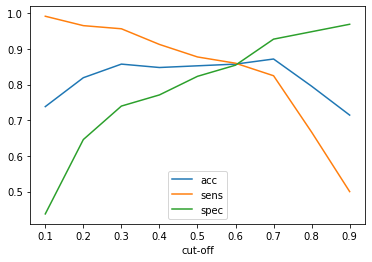

In [61]:
# Sens Vs Spec
dist.plot.line(x='cut-off', y=['acc', 'sens', 'spec'])

<AxesSubplot:xlabel='cut-off'>

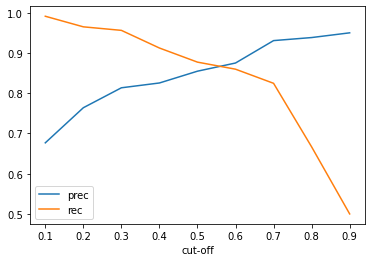

In [62]:
# Prec Vs Recall

dist.plot.line(x='cut-off', y=['prec', 'rec'])

Observation,
- 0.6 is the tradeoff point between sensitivity and specificity.
- 0.55 is the tradeoff point between precision and recall.


Choice of probability cutoff value dependes upon the problem we are solving.
Here we need to detect all the people with heart disease and also avoid falsely detecting healthy people. So, both precision and recall should be high. Hence, we would use prec Vs recall cutoff which is 0.55.

In [63]:
# updating the prediction using cut-off probability of 0.55
train_pred['prediction'] = res7.predict(X_train_sm).apply(lambda x: 1 if x>0.55 else 0)

train_pred

,target,prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,prediction
240,0,0.012953,0,0,0,0,0,0,0,0,0,0
255,0,0.006528,0,0,0,0,0,0,0,0,0,0
73,1,0.721934,1,1,1,1,1,1,1,0,0,1
41,1,0.800193,1,1,1,1,1,1,1,1,0,1
290,0,0.148145,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,0.006406,0,0,0,0,0,0,0,0,0,0
18,1,0.828225,1,1,1,1,1,1,1,1,0,1
264,0,0.127650,1,0,0,0,0,0,0,0,0,0
157,1,0.939172,1,1,1,1,1,1,1,1,1,1


In [64]:
# updated confusion matrix using cut-off probability of 0.55 
cm = confusion_matrix(train_pred.target, train_pred.prediction)
print(cm)

acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
sens = cm[1,1] / float(cm[1,1]+cm[1,0])
spec = cm[0,0] / float(cm[0,0]+cm[0,1])
prec = cm[1,1] / float(cm[1,1]+cm[0,1])
rec = sens

print('accuracy:',acc)
print('sensitivity/recall:',sens)
print('specificity:',spec)
print('precision:',prec)

[[82 14]
 [16 98]]
accuracy: 0.8571428571428571
sensitivity/recall: 0.8596491228070176
specificity: 0.8541666666666666
precision: 0.875


#### ROC Curve

An ROC curve shows:

- tradeoff between sensitivity and specificity 
- The cureve shoud have as high as possible area under it. Hence it should ideally follow closely to y axis and then to top.

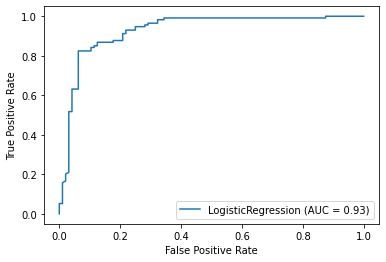

In [65]:
# Checking the perfomanrce 
lm8 = LogisticRegression()
lm8.fit(X_train, y_train)
plot_roc_curve(lm8, X_train, y_train)

Observation,
- AUC is having values 0.93 which is quite good performance.

### Evaluation on test dataset

In [66]:
X_test_sm = sm.add_constant(X_test)
test_pred = pd.DataFrame(res7.predict(X_test_sm).apply(lambda x: 1 if x>0.55 else 0), columns=['prediction'])
test_pred['target'] = y_test

test_pred

,prediction,target
214,0,0
25,1,1
22,1,1
256,0,0
94,1,1
...,...,...
64,1,1
24,0,1
295,0,0
196,1,0


In [67]:
cm = confusion_matrix(test_pred.target, test_pred.prediction)
print(cm)

acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
sens = cm[1,1] / float(cm[1,1]+cm[1,0])
spec = cm[0,0] / float(cm[0,0]+cm[0,1])
prec = cm[1,1] / float(cm[1,1]+cm[0,1])
rec = sens

print('accuracy:',acc)
print('sensitivity/recall:',sens)
print('specificity:',spec)
print('precision:',prec)

[[34  7]
 [11 39]]
accuracy: 0.8021978021978022
sensitivity/recall: 0.78
specificity: 0.8292682926829268
precision: 0.8478260869565217


#### Feature Importance

In [68]:
betas = pd.DataFrame(index=X_train.columns)
betas['betas'] = lm8.coef_.reshape(X_train.shape[1],-1)

print('Bottom 5 features:', betas.sort_values('betas').head(5))
print('Top 5 features:', betas.sort_values('betas', ascending=False).head(5))

Bottom 5 features:                     betas
ca_3_ves        -1.641079
ca_1_ves        -1.527794
ca_2_ves        -1.520854
thal_rev_defect -1.385229
oldpeak         -1.281213
Top 5 features:                betas
cp_cat_2    1.052167
sex_male   -0.774831
trestbps   -0.867527
slope_flat -0.958157
exang_yes  -1.171099


## 7. Conclusion/Recommendation

Conclusion:
- Final model is having test accuracy of ~0.80 and train accuracy of ~0.85.
- Model is having test sensitivity of ~0.78 and precision of ~0.84.
- There are many matrix available for logistic regression. The choice of matrix purely depends upon the nature of problem being solved.
- Final model is having 10 features.
- Top 5 features are: 'ca_3_ves', 'ca_1_ves', 'ca_2_ves', 'thal_rev_defect', 'oldpeak'

-----------